### Vicheda Narith - msz4442

## Q0. Preparations.



### Import/install all needed packages here.
Run the code blocks without change anything!


In [55]:
import json
import pandas as pd
import scipy
from scipy import stats
!pip install apyori
from apyori import apriori
import matplotlib.pyplot as plt

## Download datasets to the current directory

In [56]:
#yelp_academic_dataset_user_no_friend.json
!wget https://nu-cs326-msai339.s3.us-east-1.amazonaws.com/yelp_academic_dataset_user_no_friend.json

--2025-10-05 02:49:21--  https://nu-cs326-msai339.s3.us-east-1.amazonaws.com/yelp_academic_dataset_user_no_friend.json
Resolving nu-cs326-msai339.s3.us-east-1.amazonaws.com (nu-cs326-msai339.s3.us-east-1.amazonaws.com)... 52.217.113.122, 52.216.26.72, 3.5.9.3, ...
Connecting to nu-cs326-msai339.s3.us-east-1.amazonaws.com (nu-cs326-msai339.s3.us-east-1.amazonaws.com)|52.217.113.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 810739533 (773M) [application/json]
Saving to: ‘yelp_academic_dataset_user_no_friend.json.1’

yelp_academic_datas 100%[===================>] 773.18M  46.4MB/s    in 15s     

2025-10-05 02:49:36 (52.2 MB/s) - ‘yelp_academic_dataset_user_no_friend.json.1’ saved [810739533/810739533]



In [57]:
#yelp_academic_dataset_business.json
!wget https://nu-cs326-msai339.s3.us-east-1.amazonaws.com/yelp_academic_dataset_business.json

--2025-10-05 02:49:36--  https://nu-cs326-msai339.s3.us-east-1.amazonaws.com/yelp_academic_dataset_business.json
Resolving nu-cs326-msai339.s3.us-east-1.amazonaws.com (nu-cs326-msai339.s3.us-east-1.amazonaws.com)... 16.15.188.253, 52.217.112.114, 52.216.113.190, ...
Connecting to nu-cs326-msai339.s3.us-east-1.amazonaws.com (nu-cs326-msai339.s3.us-east-1.amazonaws.com)|16.15.188.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118833712 (113M) [application/json]
Saving to: ‘yelp_academic_dataset_business.json.1’

yelp_academic_datas 100%[===================>] 113.33M  59.5MB/s    in 1.9s    

2025-10-05 02:49:39 (59.5 MB/s) - ‘yelp_academic_dataset_business.json.1’ saved [118833712/118833712]



## Load data to pandas DataFrames.

In [58]:
df_user = pd.read_json("yelp_academic_dataset_user_no_friend.json", lines=True)

In [59]:
df_bussiness = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [60]:
# to browse the dataframe df_user
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,267,3.91,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3138,3.74,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013",52,3.32,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011",28,4.27,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,1,3.54,...,1,0,0,0,1,1,0,0,0,0


In [61]:
# to browse the dataframe df_bussiness
df_bussiness.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


## Q1. Correlation coefficient

### Q1a

In [62]:
def Q1a():
  # input: NA
  # return: tuple of the strongest linear pair, the correlation coefficient

  # target columns
  cols = ["funny", "cool", "useful", "fans", "review_count"]
  subset = df_user[cols]

  # correlation matrix
  corr_matrix = subset.corr(method='pearson')

  # strongest pair
  corr_unstack = corr_matrix.unstack()
  corr_unstack = corr_unstack[corr_unstack.index.get_level_values(0) != corr_unstack.index.get_level_values(1)]

  strongest_pair = corr_unstack.abs().idxmax()
  coeff = corr_matrix.loc[strongest_pair]

  return strongest_pair, coeff

In [63]:
Q1a()

(('cool', 'useful'), np.float64(0.9918405554731298))

### Q1b

#### Analysis.

In [64]:
from scipy.stats import pearsonr, spearmanr
from datetime import datetime

def Q1b():
  # the number of years the users on Yelp given the year they joined
  df_user["join_year"] = pd.to_datetime(df_user['yelping_since']).dt.year
  df_user["years_joined"] = datetime.now().year - df_user['join_year']

  # pearson and spearmean calculation
  pearson, _ = pearsonr(df_user['average_stars'], df_user['years_joined'])
  spearman, _ = spearmanr(df_user['average_stars'], df_user['years_joined'])

  return pearson, spearman

In [65]:
Q1b()

(np.float64(0.11355298812690996), np.float64(0.029865101383489346))

#### Conclusions.

In [66]:
def Q1b_concl():
  conclusions = "Both Pearson and Spearman coefficients are 0.1136 and 0.0299, respectively. This shows a negligible correlation. Thus, the number of years the user was on Yelp and their average rating are not related."
  return conclusions

In [67]:
Q1b_concl()

'Both Pearson and Spearman coefficients are 0.1136 and 0.0299, respectively. This shows a negligible correlation. Thus, the number of years the user was on Yelp and their average rating are not related.'

### Q1c

#### Analysis.

In [68]:
def Q1c():
  # the number of years the users was on elite
  df_user['years_elite'] = df_user['elite'].apply(lambda x: len(x.split(",")) if isinstance(x,str) and x != "" else 0)

  # pearson and spearmean calculation
  pearson, _ = pearsonr(df_user['review_count'], df_user['years_elite'])
  spearman, _ = spearmanr(df_user['review_count'], df_user['years_elite'])

  return pearson, spearman


In [69]:
Q1c()

(np.float64(0.6944354493467567), np.float64(0.3512441417477128))

#### Plot.

In [70]:
def Q1c_plot():
  # plot a boxplot
  years_elite_sorted = sorted(df_user["years_elite"].unique())
  review_counts_by_year = [
      df_user.loc[
          df_user["years_elite"] == y,
          "review_count"
          ]
          for y in years_elite_sorted
      ]

  plt.figure(figsize=(8,5))
  plt.boxplot(review_counts_by_year, labels = years_elite_sorted)
  plt.xlabel("Years as Elite")
  plt.ylabel("Review Count")
  plt.title("Review Counts Distribution by Elite Years")
  plt.show()

/tmp/ipython-input-1287597944.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_user.loc[df_user["years_elite"] == y, "review_count"] for y in sorted(df_user["years_elite"].unique())],


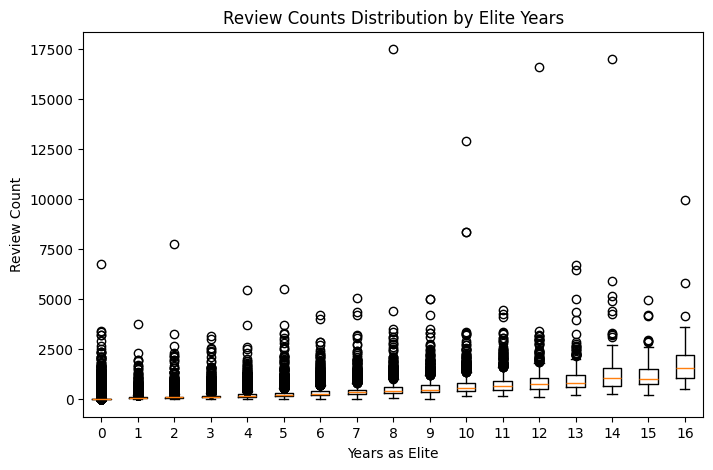

In [71]:
Q1c_plot()

#### Conclusions.

In [72]:
def Q1c_concl():
  conclusions = "The Pearson correlation is about 0.69, illustrating a linear relationship between the review counts and years as elite. At the same time, Spearman correlation is approximately 0.35, which tells us that the relationship is not monotonic. From the boxplot, users with more elite years tend to have more reviews, but the variance grows as the number of elite years increaseses as well."
  return conclusions

In [73]:
Q1c_concl()

'The Pearson correlation is about 0.69, illustrating a linear relationship between the review counts and years as elite. At the same time, Spearman correlation is approximately 0.35, which tells us that the relationship is not monotonic. From the boxplot, users with more elite years tend to have more reviews, but the variance grows as the number of elite years increaseses as well.'

## Q2. Chi Square Test

#### Analysis.

In [74]:
from scipy.stats import chi2_contingency
def Q2():
  # x == 1 is Open
  df_bussiness["is_open_flag"] = df_bussiness["is_open"].apply(lambda x: "Open" if x == 1 else "Closed")

  # Greater: stars > 2.5
  # Lower: stars <= 2.5
  df_bussiness["high_rating"] = df_bussiness["stars"].apply(lambda x: "Greater" if x > 2.5 else "Lower")

  # contingency table
  contingency_table = pd.crosstab(df_bussiness["is_open_flag"], df_bussiness["high_rating"])
  # chi-square test
  chi_square = chi2_contingency(contingency_table)

  return contingency_table.values, chi_square

In [75]:
Q2()

(array([[24694,  5946],
        [94861, 24742]]),
 Chi2ContingencyResult(statistic=np.float64(24.537911323738985), pvalue=np.float64(7.286202739949841e-07), dof=1, expected_freq=array([[24381.60313625,  6258.39686375],
        [95173.39686375, 24429.60313625]])))

#### Conclusions.

In [76]:
def Q2_concl():
  conclusions = "The chi-square test shows that the p-vlaue is around 7.28e-07, which is less than the significant level of 0.05. So, we reject the null hypothesis, thus they are dependent. Businesses with higher ratings are more likely to stay open, and lower ratings are tend to be closed."
  return conclusions

In [77]:
Q2_concl()

'The chi-square test shows that the p-vlaue is around 7.28e-07, which is less than the significant level of 0.05. So, we reject the null hypothesis, thus they are dependent. Businesses with higher ratings are more likely to stay open, and lower ratings are tend to be closed.'

## Q3. Association rule

In [78]:
#helper function
def Q3o():
  pass

### Q3a

In [79]:
def Q3a():
  pass

In [80]:
Q3a()

### Q3b

#### Analysis.

In [81]:
def Q3b():
  pass

In [82]:
Q3b()

#### Conclusions.

In [83]:
#TODO: modify the conclusions strings
def Q3b_concl():
  pass

In [84]:
print(Q3b_concl())

None


## Q4. ANOVA

### Q4a

In [85]:
#helper function
def Q4o():
  pass

#### Plot.

In [86]:
def Q4a():
  pass


In [87]:
Q4a()

#### Conclusions.

In [88]:
def Q4a_concl():
  pass


In [89]:
Q4a_concl()

### Q4b

#### Formulate hypothesis.

In [90]:
def Q4b_hyp():
  Ho=""
  Ha=""
  return H0,Ha


In [91]:
Q4b_hyp()

NameError: name 'H0' is not defined

#### Check for ANOVA assumptions.

In [ ]:
def Q4b_var():
  pass


In [ ]:
Q4a_var()

In [ ]:
def Q4b_dist():
  pass


In [ ]:
Q4a_dist()

#### ANOVA.

In [ ]:
def Q4b_anova():
  pass


In [ ]:
Q4a_anova()

#### Conclusions.

In [ ]:
def Q4b_concl():
  pass


In [ ]:
Q4b_concl()

### Q4c

#### Formulate hypothesis.

#### Check for ANOVA assumptions.

#### ANOVA.

#### Conclusions.